## Heart Disease Prediction

## About Dataset

Key Indicators of Heart Disease
2020 annual CDC survey data of 400k adults related to their health status
What topic does the dataset cover?
According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

Where did the dataset come from and what treatments did it undergo?
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. As the CDC describes: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.". The most recent dataset (as of February 15, 2022) includes data from 2020. It consists of 401,958 rows and 279 columns. The vast majority of columns are questions asked to respondents about their health status, such as "Do you have serious difficulty walking or climbing stairs?" or "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]". In this dataset, I noticed many different factors (questions) that directly or indirectly influence heart disease, so I decided to select the most relevant variables from it and do some cleaning so that it would be usable for machine learning projects.

###List of columns
**HeartDisease** <br>
Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)<br>
**BMI**<br>
Body Mass Index (BMI)<br>
**Smoking**<br>
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]<br>
**AlcoholDrinking**<br>
Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week<br>
**Stroke**<br>
(Ever told) (you had) a stroke?<br>
**PhysicalHealth**<br>
Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30<br>
**MentalHealth**<br>
Thinking about your mental health, for how many days during the past 30 days was your mental health not good?<br>
**DiffWalking**<br>
Do you have serious difficulty walking or climbing stairs?<br>
**Sex**<br>
Are you male or female?<br>
**AgeCategory**<br>
Fourteen-level age category<br>
**Race**<br>
Imputed race/ethnicity value<br>
**Diabetic**<br>
(Ever told) (you had) diabetes?<br>
**PhysicalActivity**<br>
Adults who reported doing physical activity or exercise during the past 30 days other than their regular job<br>
**GenHealth**<br>
Would you say that in general your health is.<br>
**SleepTime**<br>
On average, how many hours of sleep do you get in a 24-hour period?<br>
**Asthma**<br>
(Ever told) (you had) asthma?<br>
**KidneyDisease**<br>
Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?<br>
**SkinCancer**<br>
(Ever told) (you had) skin cancer?<br>



In [3]:
# Imports

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score , f1_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
from sklearn.ensemble import RandomForestClassifier

## Getting The Data

In [4]:
# Now let's read the dataset:

df = pd.read_csv("heart_2020_cleaned.csv")
df.sample(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
7682,No,15.79,Yes,No,No,0.0,0.0,No,Female,70-74,White,No,Yes,Very good,6.0,No,No,No
25916,No,23.30,Yes,No,No,0.0,0.0,No,Male,25-29,White,No,No,Excellent,9.0,Yes,No,No
8161,No,40.74,Yes,No,No,0.0,0.0,Yes,Female,70-74,White,No,Yes,Good,7.0,No,No,No
32250,Yes,32.72,Yes,No,No,10.0,0.0,No,Male,65-69,White,Yes,No,Fair,6.0,No,No,No
46639,No,29.41,Yes,No,Yes,15.0,0.0,Yes,Male,65-69,White,Yes,Yes,Good,5.0,No,No,No
8234,No,34.28,No,No,No,0.0,0.0,No,Male,50-54,Hispanic,No,Yes,Poor,6.0,Yes,No,No
52619,No,26.40,Yes,No,No,0.0,0.0,No,Male,70-74,White,No,Yes,Good,5.0,No,No,No
36333,No,19.66,No,No,No,0.0,0.0,No,Male,18-24,White,No,Yes,Very good,8.0,No,No,No
34711,No,34.96,No,No,No,4.0,0.0,No,Male,35-39,White,No,Yes,Very good,8.0,No,No,No
3745,Yes,30.71,No,No,No,20.0,0.0,Yes,Male,50-54,Black,Yes,No,Poor,8.0,No,No,No


## Checking The Data

In [5]:
# Getting the bascic information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53005 entries, 0 to 53004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      53005 non-null  object 
 1   BMI               53005 non-null  float64
 2   Smoking           53005 non-null  object 
 3   AlcoholDrinking   53005 non-null  object 
 4   Stroke            53005 non-null  object 
 5   PhysicalHealth    53005 non-null  float64
 6   MentalHealth      53005 non-null  float64
 7   DiffWalking       53005 non-null  object 
 8   Sex               53005 non-null  object 
 9   AgeCategory       53005 non-null  object 
 10  Race              53005 non-null  object 
 11  Diabetic          53005 non-null  object 
 12  PhysicalActivity  53005 non-null  object 
 13  GenHealth         53005 non-null  object 
 14  SleepTime         53005 non-null  float64
 15  Asthma            53005 non-null  object 
 16  KidneyDisease     53005 non-null  object

In [6]:
# Getteing the basic information about the distribution of our datasets
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,53005.000000,53005.000000,53005.000000,53005.000000
mean,28.011029,3.579625,4.035280,7.125460
std,6.290913,8.147079,8.051514,1.515022
min,12.130000,0.000000,0.000000,1.000000
25%,23.710000,0.000000,0.000000,6.000000
50%,26.990000,0.000000,0.000000,7.000000
75%,31.090000,2.000000,4.000000,8.000000
max,87.050000,30.000000,30.000000,24.000000


In [7]:
# Checking null values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
# Checking for duplicated values
duplicated = len(df[df.duplicated()])
print(f'There ara {duplicated} duplicated rows')

There ara 549 duplicated rows


In [10]:
df = df.drop_duplicates()
df.reset_index(inplace=True)

In [11]:
# Checking the balance of the data
df['HeartDisease'].value_counts()

No     47826
Yes     4630
Name: HeartDisease, dtype: int64

<Axes: >

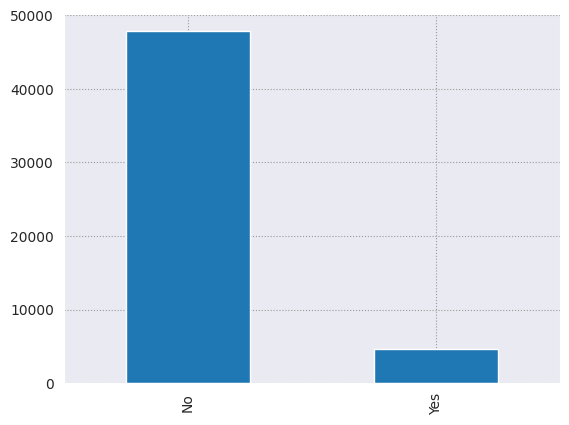

In [12]:
df['HeartDisease'].value_counts().plot(kind='bar')

**It seems like our data is very much imbalanced** 


In [13]:
numerical_columns =['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_columns =['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']

In [14]:
# Get Information for Features and unique values in columns
for feature in df.columns:
    print(feature)
    print(df[feature].unique(),"\n")

index
[    0     1     2 ... 53002 53003 53004] 

HeartDisease
['No' 'Yes'] 

BMI
[16.6  20.34 26.58 ... 43.71 17.03 29.93] 

Smoking
['Yes' 'No'] 

AlcoholDrinking
['No' 'Yes'] 

Stroke
['No' 'Yes'] 

PhysicalHealth
[ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth
[30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking
['No' 'Yes'] 

Sex
['Female' 'Male'] 

AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity
['Yes' 'No'] 

GenHealth
['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.

In [15]:
df['GenHealth']= df['GenHealth'].replace({'Goo':'Good'})

## Exploratory Data Analysis

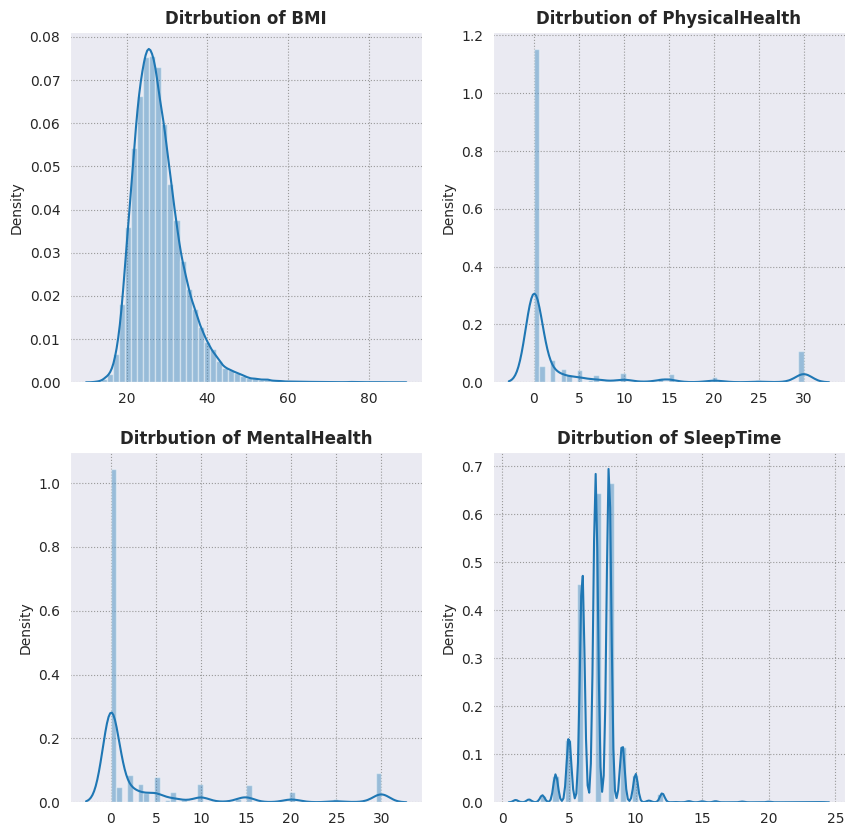

In [16]:
i = 1
plt.figure(figsize=(10,10))
for feature in numerical_columns:
  plt.subplot(2,2,i)
  sns.distplot(x=df[feature])
  plt.title(f"Ditrbution of {feature}",weight='bold')
  i+=1

<Axes: xlabel='HeartDisease', ylabel='SleepTime'>

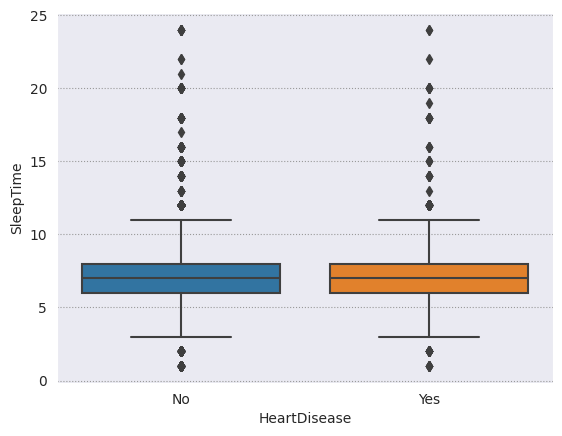

In [17]:
sns.boxplot(y=df["SleepTime"], x=df["HeartDisease"])

<Axes: xlabel='HeartDisease', ylabel='BMI'>

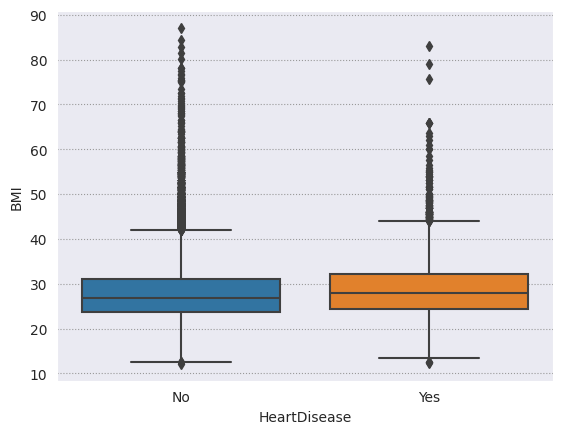

In [18]:
sns.boxplot(y=df["BMI"], x=df["HeartDisease"])

In [19]:
col=['BMI','SleepTime']
for i in col:
  q1=df[i].quantile(.25)
  q3=df[i].quantile(.75)
  iqr=q3-q1
  upper_limit=q3+1.5*iqr
  lower_limit=q1-1.5*iqr
  df[i]=np.where(df[i]>upper_limit,upper_limit,
                  np.where(df[i]<lower_limit,lower_limit,df[i]))

<Axes: xlabel='HeartDisease', ylabel='SleepTime'>

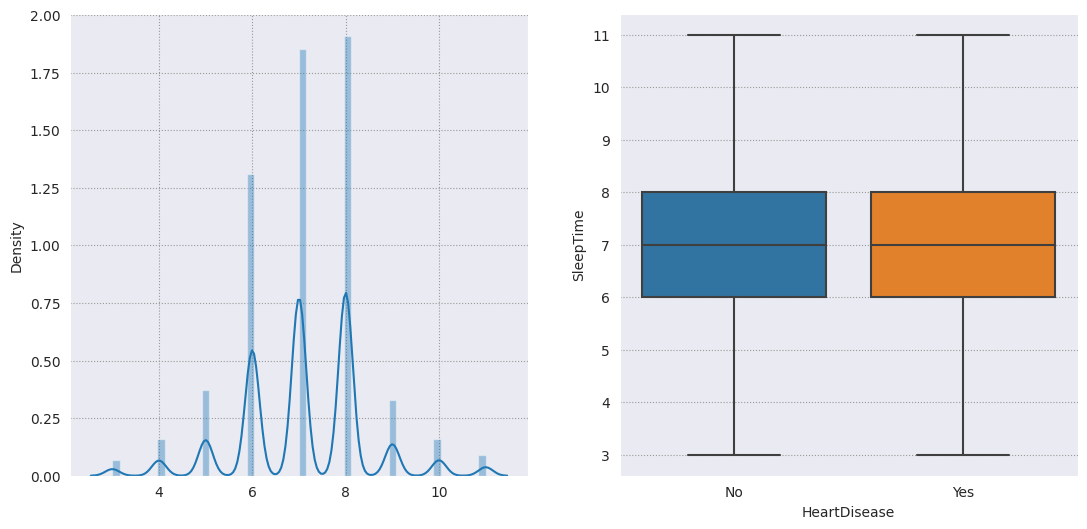

In [20]:

fig, axes = plt.subplots(1, 2, figsize=(13, 6))
sns.distplot(ax=axes[0],x=df['SleepTime'])
sns.boxplot(ax=axes[1],y=df["SleepTime"], x=df["HeartDisease"])

<Axes: xlabel='HeartDisease', ylabel='BMI'>

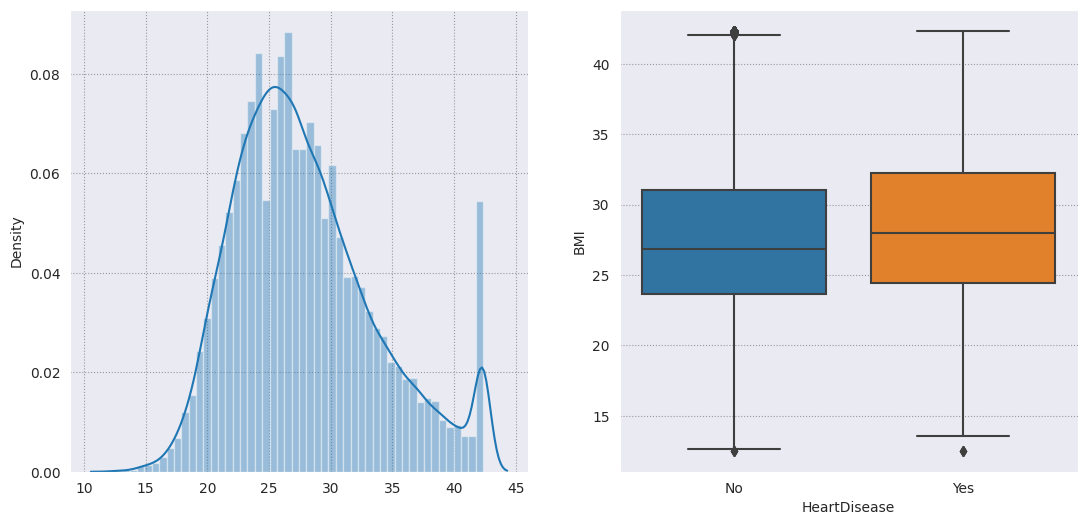

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
sns.distplot(ax=axes[0],x=df['BMI'])
sns.boxplot(ax=axes[1],y=df["BMI"], x=df["HeartDisease"])

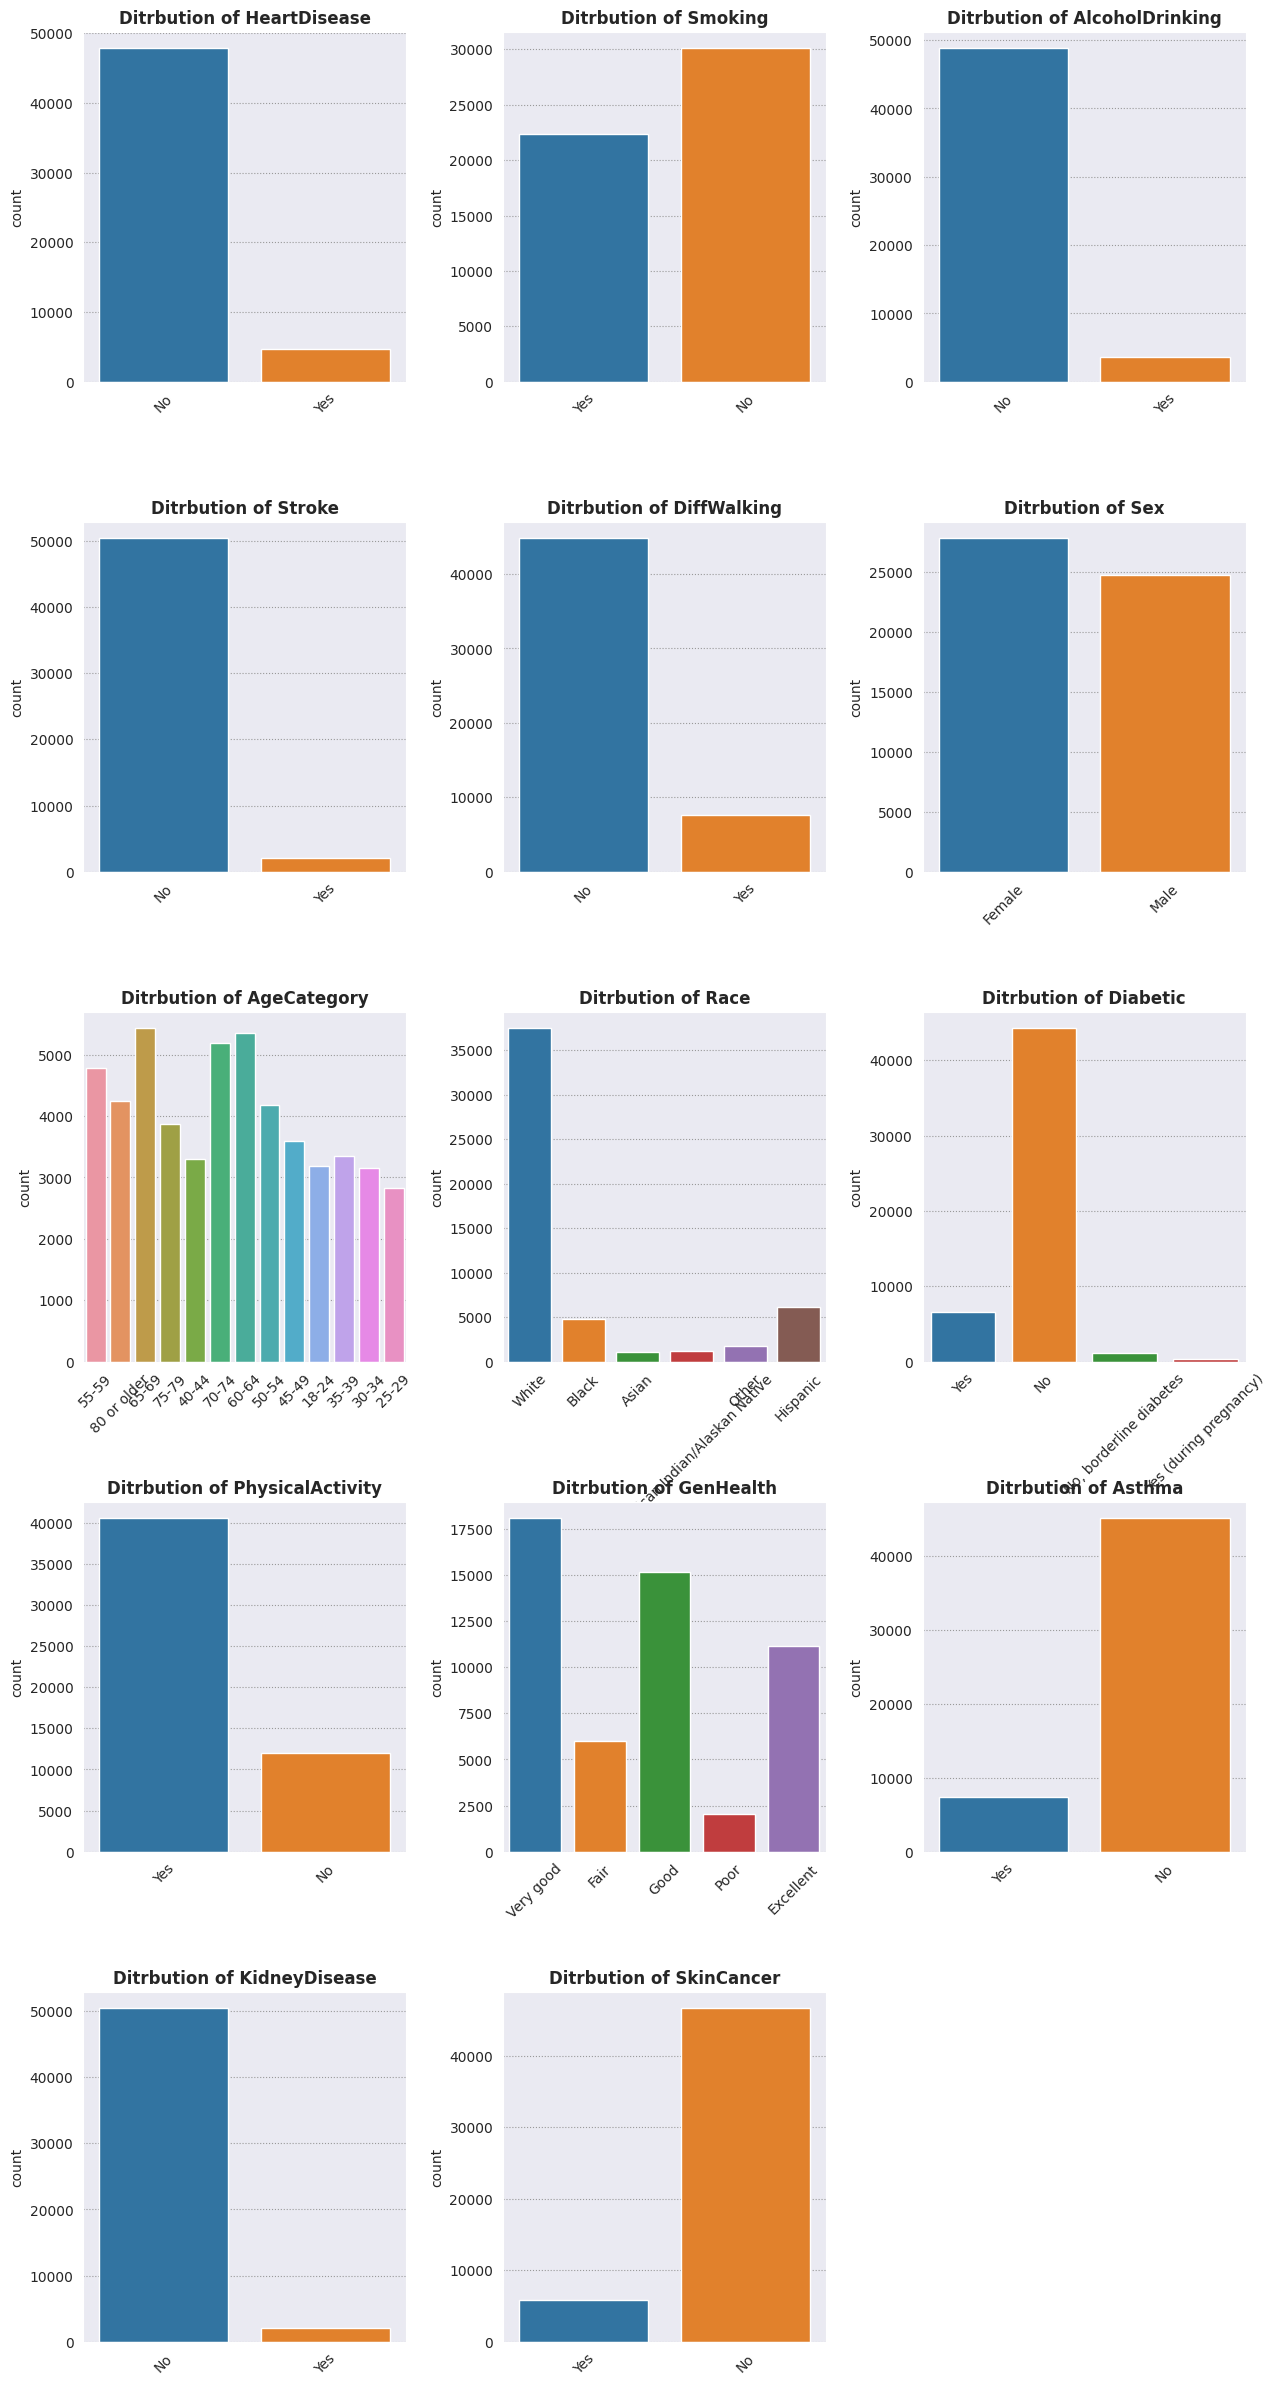

In [22]:
i=1
plt.figure(figsize=(15,30))
for col in categorical_columns:
    plt.subplot(5,3,i)
    plt.xticks(rotation=45)
    sns.countplot(x=col,data=df)
    plt.title(f"Ditrbution of {col}",weight='bold')
    plt.xlabel('')
    plt.subplots_adjust(hspace=0.4,wspace=0.3)
    i+=1

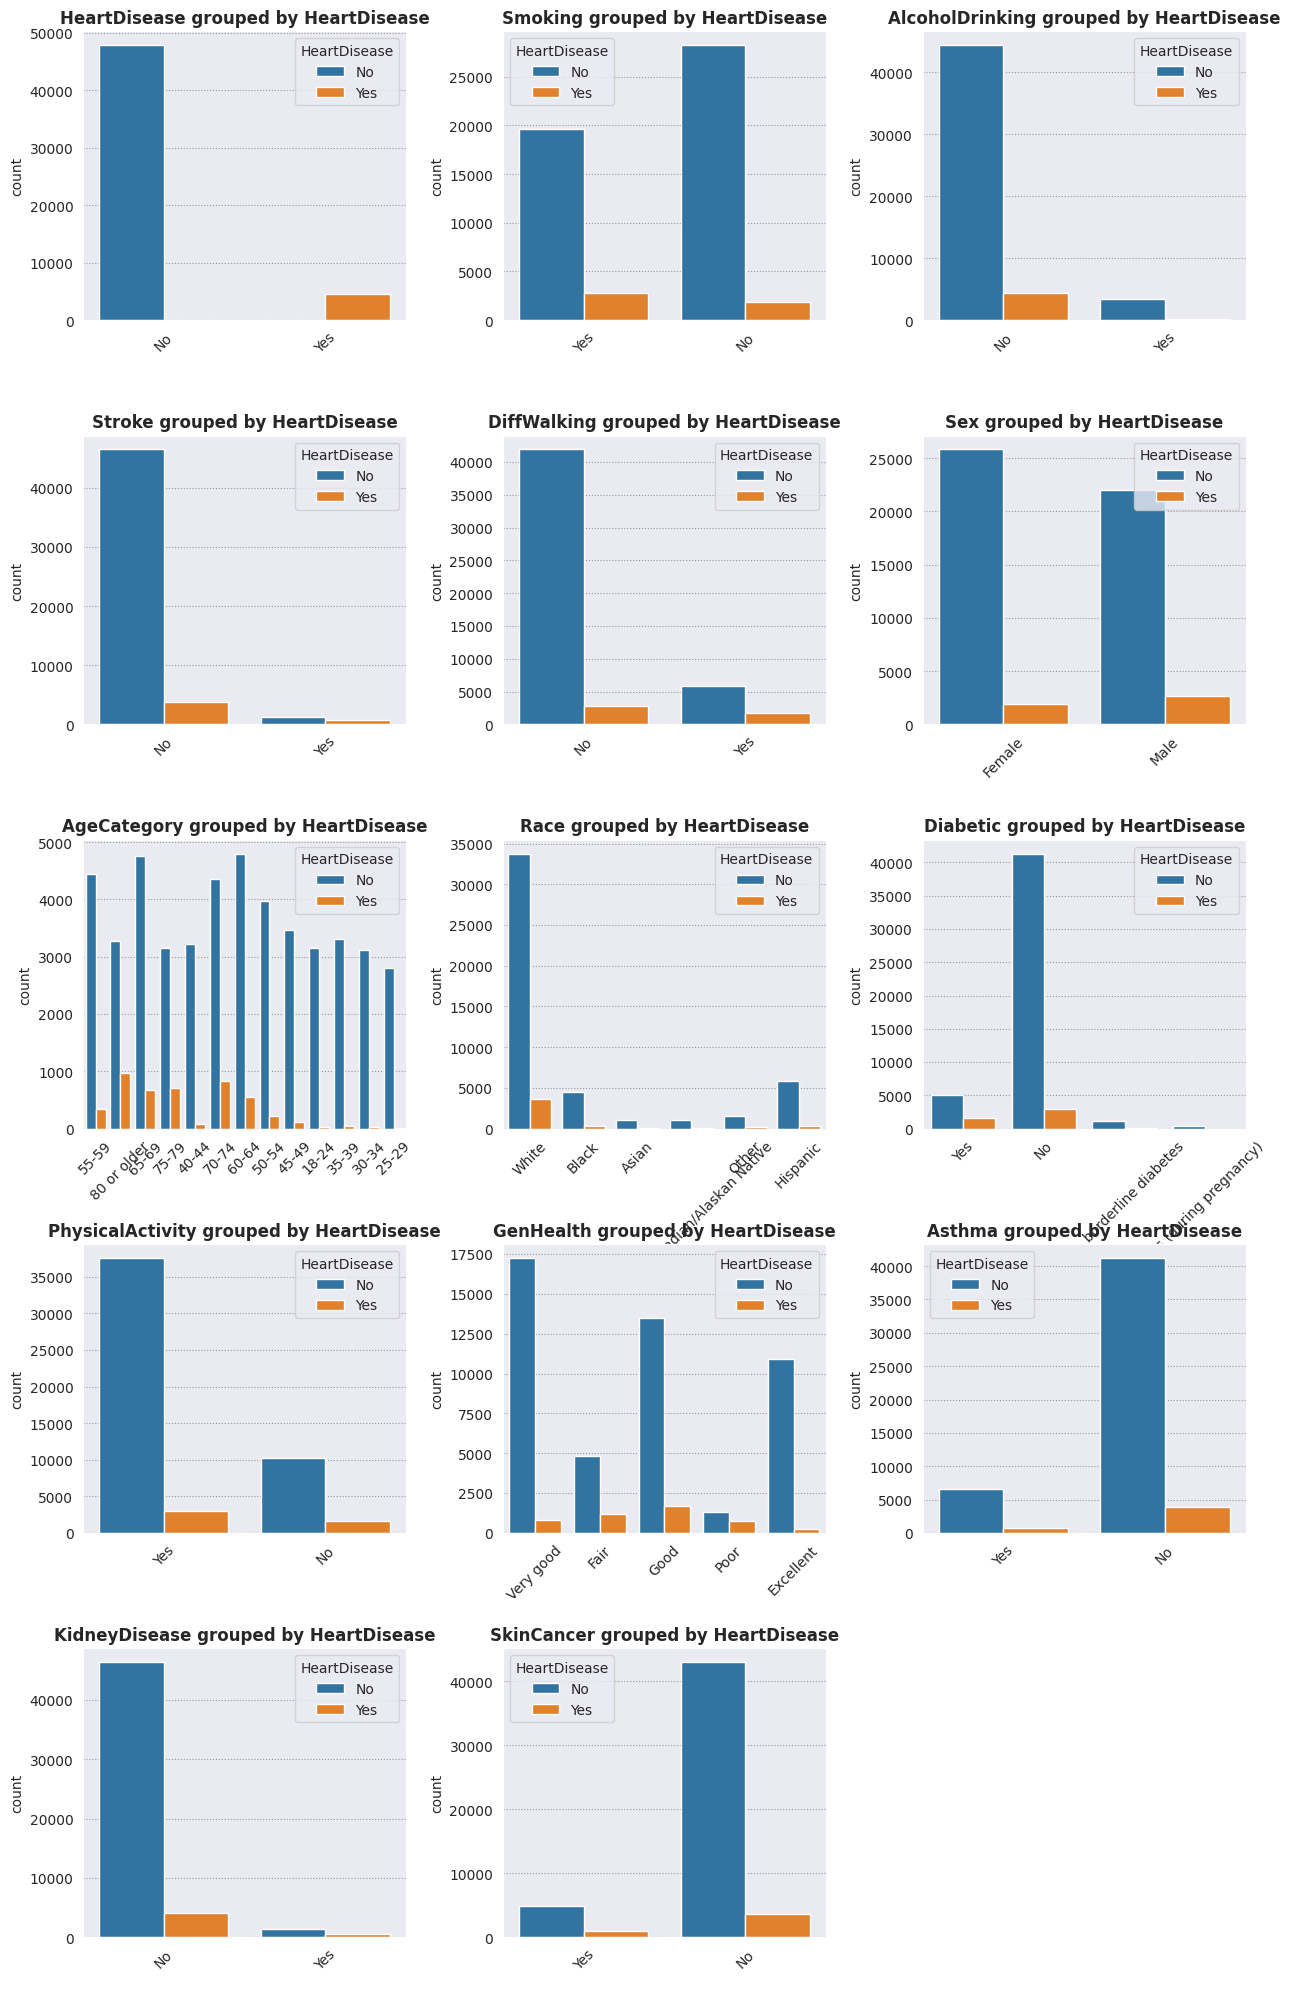

In [23]:
i=1
plt.figure(figsize=(15,30))
for col in df.select_dtypes(include='object').columns:
    plt.subplot(6,3,i)
    plt.xticks(rotation=45)
    sns.countplot(x=col,data=df,hue='HeartDisease')
    plt.title(f"{col} grouped by HeartDisease",fontweight='bold')
    plt.xlabel(' ')
    plt.subplots_adjust(hspace=0.4,wspace = 0.3)
    i+=1

As we can see from the above charts :

1. People with the smoking habit have higher rate of heart disease compared to the people that do not smoke.
2. Males have heart disease more than females.
3. People who have stroke can have heart disease more than don't
4. people older than 40 years old have higher chance of having heart diseases.
5. There is no noticeable differences between adults with and without heart disease in being a heavy drinker or having asthma.

## Data Processing

In [24]:
# Adjusting the AgeCategory Column
mapping = {'18-24':0, '25-29': 1, '30-34':2, '35-39':3 , 
           '40-44':4,  '45-49':5, '50-54':6, '55-59':7, 
           '60-64':8,'65-69':9, '70-74':10, '75-79':11, '80 or older':12}
df['AgeCategory'] = df['AgeCategory'].replace(mapping)

In [25]:
df['Race'].unique()
df['Race'] = df['Race'].replace({'White':0,'Black':1,'Asian':2,'American Indian/Alaskan Native':3,'Other':4, 'Hispanic':5})

In [26]:
binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity' , 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in binary_columns:
    df[column] = df[column].replace({'No':0 , 'Yes':1}) 

In [27]:
df['Diabetic'] = df['Diabetic'].replace({'No':0 , 'No, borderline diabetes':1 ,  'Yes (during pregnancy)':2 , 'Yes':3})   

In [28]:
df['GenHealth'] = df['GenHealth'].replace({'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4})    

In [29]:
df['Sex'] = df['Sex'].replace({'Male':1,'Female':0})

## Corelation

In [30]:
df.corr()['HeartDisease'].sort_values(ascending = False)

HeartDisease        1.000000
AgeCategory         0.238382
Stroke              0.210088
DiffWalking         0.206551
Diabetic            0.190806
PhysicalHealth      0.176225
KidneyDisease       0.142520
Smoking             0.109480
SkinCancer          0.104429
Sex                 0.067394
BMI                 0.050314
Asthma              0.027956
MentalHealth        0.025439
SleepTime           0.007200
index              -0.004192
AlcoholDrinking    -0.025315
Race               -0.054633
PhysicalActivity   -0.103097
GenHealth          -0.251044
Name: HeartDisease, dtype: float64

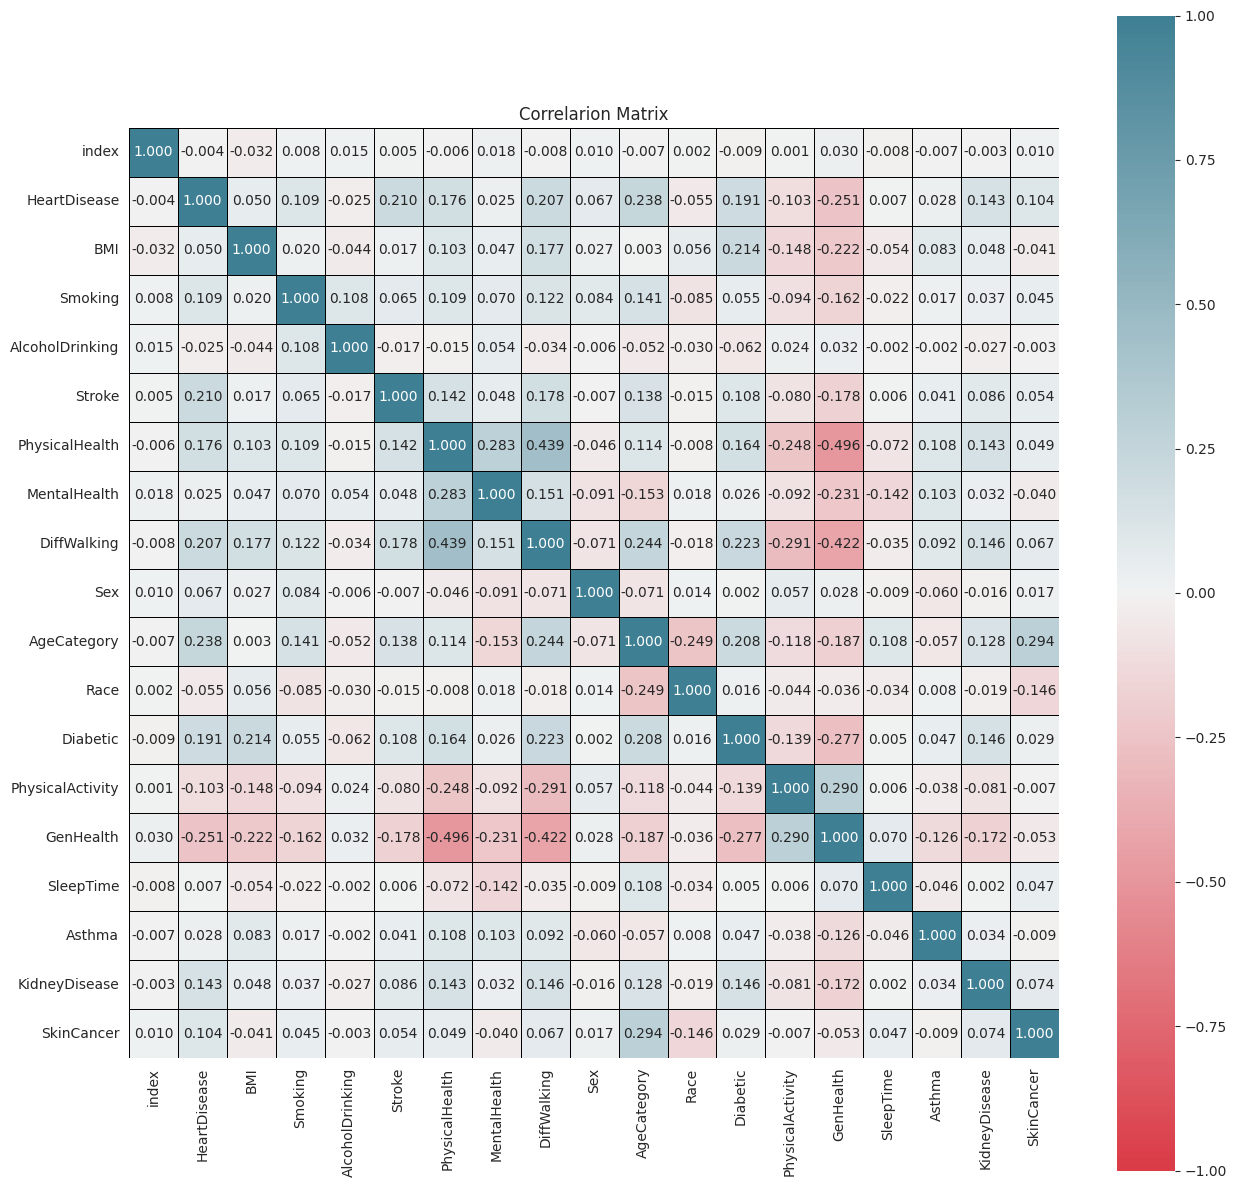

In [31]:
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(10, 220, as_cmap=True)

sns.heatmap(
    data=df.corr(), 
    vmin=-1.0, 
    vmax=1.0, 
    center=0, 
    cmap=cmap, 
    square=True,
    linewidths=0.5, 
    linecolor='k',
    annot=True, 
    fmt='.3f',

)
plt.title('Correlarion Matrix')
plt.show()

## Splitting The data

In [32]:
X = df.drop(['HeartDisease','index'],axis=1)
y = df['HeartDisease']

# Using SMOTE to balance data 
smote = SMOTE()
X,y = smote.fit_resample(X,y)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
# # Using SMOTE to balance data for traning
# smote = SMOTE()
# X_train,y_train=smote.fit_resample(X_train,y_train)

<Axes: >

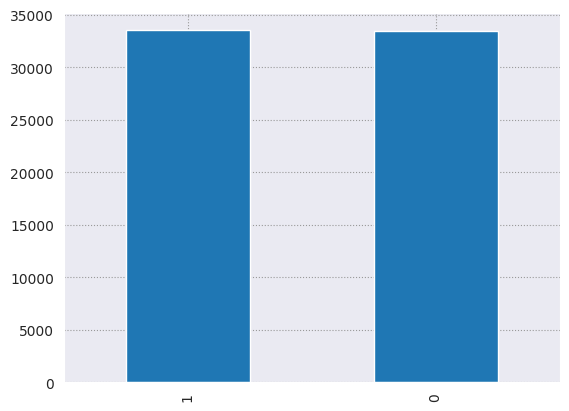

In [35]:
y_train.value_counts().plot(kind='bar')

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling : Random Forest

In [37]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_predict = random_forest.predict(X_test)
print(classification_report(y_test,random_forest_predict))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     14391
           1       0.91      0.93      0.92     14305

    accuracy                           0.92     28696
   macro avg       0.92      0.92      0.92     28696
weighted avg       0.92      0.92      0.92     28696



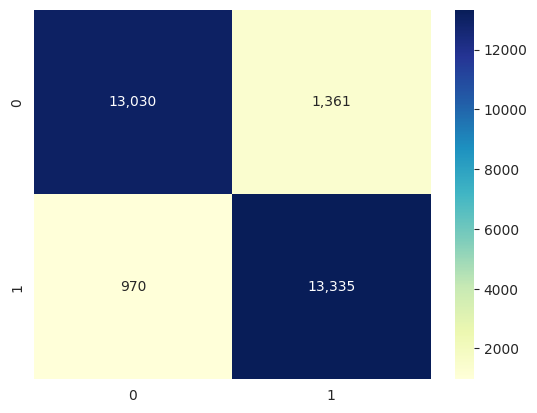

In [38]:
sns.heatmap(confusion_matrix(y_test, random_forest_predict), annot=True, fmt=',d',cmap="YlGnBu");

## Model Tunning

In [39]:
rfc = RandomForestClassifier()
parameters = [{'max_depth': [5,10,15,20,25],
               'criterion':['gini', 'entropy', 'log_loss']} ]
clf = GridSearchCV(rfc, parameters, cv = 5, scoring='accuracy')
clf.fit(X_train, y_train)
print('Best Score is :', clf.best_score_)
print('Best Parameters are :', clf.best_params_)
print('Best Estimator is :', clf.best_estimator_)

Best Score is : 0.9043999264114604
Best Parameters are : {'criterion': 'log_loss', 'max_depth': 25}
Best Estimator is : RandomForestClassifier(criterion='log_loss', max_depth=25)


In [40]:
new_model = clf.best_estimator_
new_model.fit(X_train, y_train)
predict = new_model.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91     14391
           1       0.90      0.94      0.92     14305

    accuracy                           0.92     28696
   macro avg       0.92      0.92      0.92     28696
weighted avg       0.92      0.92      0.92     28696



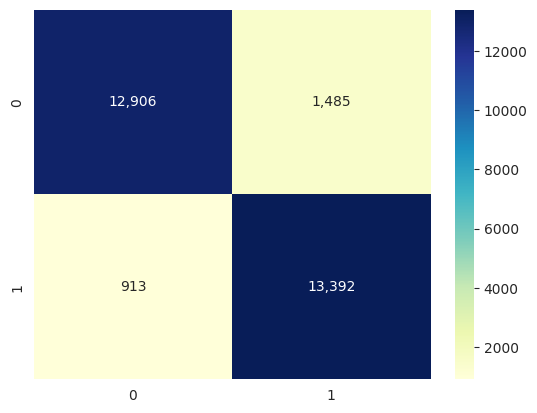

In [41]:
sns.heatmap(confusion_matrix(y_test,predict), annot=True, fmt=',d',cmap="YlGnBu");

## ★·.·´¯`·.·★ Ｔℍᗩ𝕟Ⓚ ㄚ𝕠𝓤 ★·.·´¯`·.·★